# Exemple 1 : Sudoku

On prend le cas de grilles disposant d'une unique solution.
D'un point de vue logique, on *peut* souhaiter distinguer en mémoire du programme :
- Une matrice 9 x 9 donnant la solution
- Une matrice 9 x 9 donnant les chiffres initiaux
- Une matrice 9 x 9 donnant les chiffres ajoutés par le joueur

Et éventuellement (c'est ce que nous ferons) inclure ces trois matrices dans un tableau `sudoku`

Du point de vue affichage, on peut souhaiter avoir :
- Les chiffres initiaux écrits en gris foncé
- Les chiffres ajoutés par le joueur, écrits en noir

### Sudoku : création d'une interface

<IPython.core.display.Javascript object>


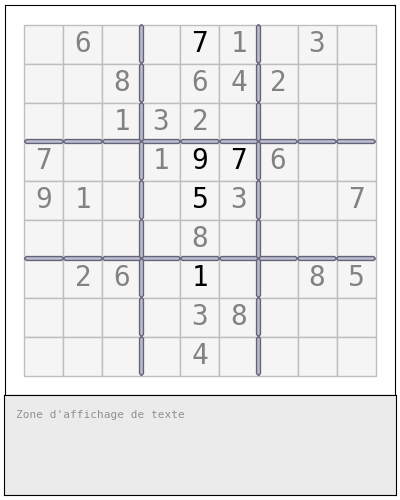

In [1]:
%matplotlib notebook
from interface_grille import Vue
NB_LIG = 9
NB_COL = 9
vue_sudo = Vue(NB_LIG, NB_COL, max_dim = 4)

### Sudoku : création des matrices et de la fonction d'affichage

In [2]:
mon_init = [[0, 6, 0, 0, 0, 1, 0, 3, 0], 
            [0, 0, 8, 0, 6, 4, 2, 0, 0], 
            [0, 0, 1, 3, 2, 0, 0, 0, 0], 
            [7, 0, 0, 1, 0, 0, 6, 0, 0],
            [9, 1, 0, 0, 0, 3, 0, 0, 7],
            [0, 0, 0, 0, 8, 0, 0, 0, 0], 
            [0, 2, 6, 0, 0, 0, 0, 8, 5], 
            [0, 0, 0, 0, 3, 8, 0, 0, 0], 
            [0, 0, 0, 0, 4, 0, 0, 0, 0]]

ma_solu = [[2, 6, 9, 8, 7, 1, 5, 3, 4], 
           [5, 3, 8, 9, 6, 4, 2, 7, 1], 
           [4, 7, 1, 3, 2, 5, 9, 6, 8], 
           [7, 8, 4, 1, 9, 2, 6, 5, 3], 
           [9, 1, 2, 6, 5, 3, 8, 4, 7], 
           [6, 5, 3, 4, 8, 7, 1, 2, 9], 
           [3, 2, 6, 7, 1, 9, 4, 8, 5], 
           [1, 4, 5, 2, 3, 8, 7, 9, 6], 
           [8, 9, 7, 5, 4, 6, 3, 1, 2]]

#on suppose la partie commencée ...
mon_jeu = [[0, 0, 0, 0, 7, 0, 0, 0, 0], 
           [0, 0, 0, 0, 0, 0, 0, 0, 0], 
           [0, 0, 0, 0, 0, 0, 0, 0, 0], 
           [0, 0, 0, 0, 9, 0, 0, 0, 0], 
           [0, 0, 0, 0, 5, 0, 0, 0, 0], 
           [0, 0, 0, 0, 0, 0, 0, 0, 0], 
           [0, 0, 0, 0, 1, 0, 0, 0, 0], 
           [0, 0, 0, 0, 0, 0, 0, 0, 0], 
           [0, 0, 0, 0, 0, 0, 0, 0, 0]]

mon_sudo = [mon_init, ma_solu, mon_jeu]

def afficher_sudoku(sudo):
    init = sudo[0]
    jeu = sudo[2]
    #compte-tenu du cahier des charges actuel, on n'a pas besoin d'afficher la solution
    
    for lig in range(9):
        for col in range(9):
            #tracé des fonds en gris clair
            vue_sudo.mg('fond', lig, col, ci = (245, 245, 245), ce = (190, 190, 190), v = True)
            
            #tracé des chiffres fournis au départ
            if init[lig][col] != 0:
                chiffre = init[lig][col]
                vue_sudo.mg('texte', lig, col, t = str(chiffre), tp = 20, c = (130, 130, 130), v = True)
            #puis des chiffres joués par le joueur
            elif jeu[lig][col] != 0:
                chiffre = jeu[lig][col]
                vue_sudo.mg('texte', lig, col, t = str(chiffre), tp = 20, c = (0, 0, 0), v = True)
            else:
                vue_sudo.mg('texte', lig, col, v = False)
                
    #tracé des séparations
    for col in range(9):
        vue_sudo.mg('mur_h', 3, col, ce = (100, 100, 120), ci = (190, 190, 210), e  = 0.10, v = True)
        vue_sudo.mg('mur_h', 6, col, ce = (100, 100, 120), ci = (190, 190, 210), e  = 0.10, v = True)
    for lig in range(9):
        vue_sudo.mg('mur_v', lig, 3, ce = (100, 100, 120), ci = (190, 190, 210), e  = 0.10, v = True)
        vue_sudo.mg('mur_v', lig, 6, ce = (100, 100, 120), ci = (190, 190, 210), e  = 0.10, v = True)

In [3]:
afficher_sudoku(mon_sudo)

**Remarque :** Ici on n'utilise pas de matrice pour stocker l'information sur l'afficahge des murs. Puisque cet affichage est constant, on l'intègre dans la fonction d'affichage (même choses pour les fonds).

### Sudoku : fonction `jouer` modifie mémoire PUIS actualise affichage

In [4]:
def jouer_sudo(sudo, lig, col, chiffre):
    '''
    Rajoute le chiffre `chiffre` dans la matrice `jeu` d'un triplet de 
    matrices `[init, solution, jeu]` représentant un sudoku puis rafraîchit l'affichage.
    '''
    init = sudo[0]
    jeu = sudo[2]
    if init[lig][col] == 0 and chiffre in range(1, 10):
        jeu[lig][col] = chiffre
    afficher_sudoku(sudo)

On peut maintenant aller jouer en utilisant la fonction `jouer_sudo` (en rajoutant une cellule de code sous le sudoku pour que ce soit plus pratique)

In [5]:
jouer_sudo(mon_sudo, 3, 5, 7 )

# Exemple 2 : Labyrinthe sur fond monochrome
On prend le cas d'un modèle simple (pas de personnages, pas d'obstacles sur le parcours).
D'un point de vue logique, on souhaite donc avoir en mémoire :
- 1 matrice 5 x 6 pour les murs horizontaux
- 1 matrice 4 x 7 pour les murs verticaux  

Ces deux matrices peuvent elles-même être incluses dans un tableau `labyrinthe` (ou pas).

### Labyrinthe : création d'une interface

<IPython.core.display.Javascript object>


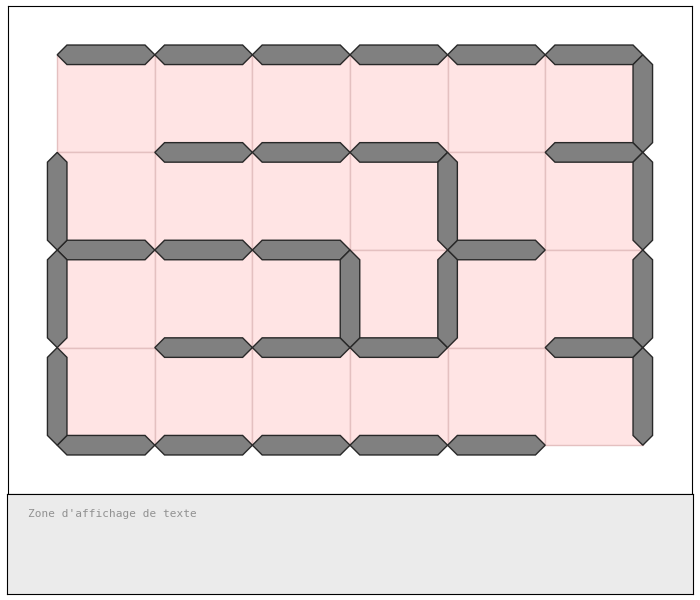

In [6]:
%matplotlib notebook
from interface_grille import Vue
NB_LIG = 4
NB_COL = 6
vue_laby = Vue(NB_LIG, NB_COL)

### Labyrinthe : création des matrices en mémoire et de la fonction d'affichage

In [7]:
mes_murs_h = [[1, 1, 1, 1, 1, 1],
              [0, 1, 1, 1, 0, 1],
              [1, 1, 1, 0, 1, 0],
              [0, 1, 1, 1, 0, 1],
              [1, 1, 1, 1, 1, 0]]

mes_murs_v = [[0, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 1, 0, 1],
              [1, 0, 0, 0, 1, 0, 1],
              [1, 0, 0, 0, 0, 0, 1]]

mon_labyrinthe = [mes_murs_h, mes_murs_v]

def afficher_labyrinthe(laby):
    murs_h = laby[0]
    murs_v = laby[1]
    
    for lig in range(NB_LIG + 1):
        for col in range(NB_COL):
            if murs_h[lig][col] == 1:
                vue_laby.mg('mur_h', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), v = True)
            else:
                vue_laby.mg('mur_h', lig, col, v = False)
                
    for lig in range(NB_LIG):
        for col in range(NB_COL + 1):
            if murs_v[lig][col] == 1:
                vue_laby.mg('mur_v', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), v = True)  
            else:
                vue_laby.mg('mur_v', lig, col, v = False)
    
    for lig in range(NB_LIG):
        for col in range(NB_COL):
            vue_laby.mg('fond', lig, col, ce = (228, 192, 192), ci = (255, 228, 228), v = True)

In [8]:
afficher_labyrinthe(mon_labyrinthe)

**Remarque :** Ici on n'utilise pas de matrice pour stocker l'information "le fond est rose". Puisque cette couleur est constante, on peut se contenter de stocker cette information dans le code de la fonction `afficher_labyrinthe`.

### Labyrinthe : fonction `modifier_mur` modifie mémoire PUIS actualise affichage

In [9]:
def modifier_mur(labyrinthe, orientation, lig, col):
    ''' 
    Selon l'orientation ()'mur_h' ou 'mur_v') et l'état du mur (présent ou supprimé), 
    ajoute ou supprime un mur dans la matrice correspondante du labyrinthe `[murs_h, murs_v]`
    puis rafraîchit l'affichage.
    '''
    if orientation == 'mur_h':
        murs = labyrinthe[0] #murs = murs_h
    elif orientation == 'mur_v':
        murs = labyrinthe[1] #murs = murs_v
        
    if murs[lig][col] == 1:
        murs[lig][col] = 0
    else:
        murs[lig][col] = 1       
    afficher_labyrinthe(labyrinthe)

On peut maintenant aller éditer le labyrinthe en utilisant les fonctions `ajouter_mur` et `effacer_mur` (en rajoutant une cellule de code sous le labyrinthe pour que ce soit plus pratique)

In [10]:
modifier_mur(mon_labyrinthe, 'mur_v', 2, 3)

<div class = "alert alert-danger">

<h3> On a bien séparé dans notre code : </h3>  
    
- l'implémentation logique (matrices en mémoire et fonction `modifier_mur`)
- l'implémentation de sortie de l'affichage (via l'interface graphique)
- l'implémentation d'interaction à la souris (via l'interface graphique)
                                              
Ce principe de séparation est fondamental. Sur n'importe quel projet, cette structuration du code (et donc de votre pensée) doit exister.  
    
(Sur des cas où l'affichage est complexe (jeux 3D HD par exemple), l'interface graphique peut influer sur la conception de la mémoire mais pas en première approche en NSI)

# Labyrinthe : dessin à la souris

## Labyrinthe, dessin à la souris : version 1 avec `visible = True` ou `visible = False`.

On part de ce qui a été fait précédemment mais on cherche à lier la fonctiona `modifier_mur` à des évènements (concrètement des clics souris sur les murs). Remarquons que pour l'affichage, on a utilisé quelque chose de standard : 
- si on a `1` en mémoire il y a un mur, on met le mur affiché en `visible = True`
- si on a `0` en mémoire il n'y a pas de mur, on met le mur affiché en `visible = False` (le mur existe mais il n'est pas affiché).

Voici donc le code précédent.

<IPython.core.display.Javascript object>


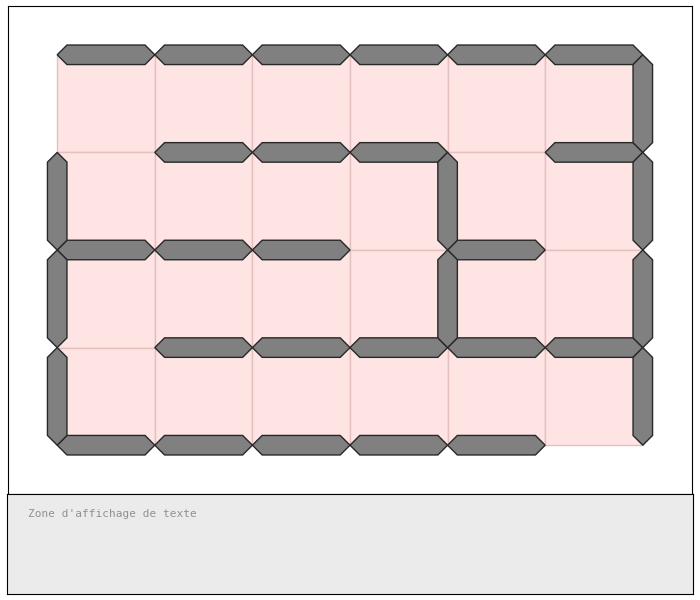

In [11]:
%matplotlib notebook
from interface_grille import Vue
NB_LIG = 4
NB_COL = 6
vue_laby = Vue(NB_LIG, NB_COL)
mes_murs_h = [[1, 1, 1, 1, 1, 1],
              [0, 1, 1, 1, 0, 1],
              [1, 1, 1, 0, 1, 0],
              [0, 1, 1, 1, 0, 1],
              [1, 1, 1, 1, 1, 0]]

mes_murs_v = [[0, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 1, 0, 1],
              [1, 0, 0, 0, 1, 0, 1],
              [1, 0, 0, 0, 0, 0, 1]]

mon_labyrinthe = [mes_murs_h, mes_murs_v]

def afficher_labyrinthe(laby):
    murs_h = laby[0]
    murs_v = laby[1]
    
    for lig in range(NB_LIG + 1):
        for col in range(NB_COL):
            if murs_h[lig][col] == 1:
                vue_laby.mg('mur_h', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), v = True)
            else:
                vue_laby.mg('mur_h', lig, col, v = False)
                
    for lig in range(NB_LIG):
        for col in range(NB_COL + 1):
            if murs_v[lig][col] == 1:
                vue_laby.mg('mur_v', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), v = True)  
            else:
                vue_laby.mg('mur_v', lig, col, v = False)
    
    for lig in range(NB_LIG):
        for col in range(NB_COL):
            vue_laby.mg('fond', lig, col, ce = (228, 192, 192), ci = (255, 228, 228), v = True)
            
def modifier_mur(labyrinthe, orientation, lig, col):
    if orientation == 'mur_h':
        murs = labyrinthe[0] #murs = murs_h
    elif orientation == 'mur_v':
        murs = labyrinthe[1] #murs = murs_v
        
    if murs[lig][col] == 1:
        murs[lig][col] = 0
    else:
        murs[lig][col] = 1       
    afficher_labyrinthe(labyrinthe)

afficher_labyrinthe(mon_labyrinthe)

On peut ajouter et/ou supprimer des murs en ligne de commande et ce sont ces instruction s que l'on veut lier à des clics de souris.

In [12]:
modifier_mur(mon_labyrinthe, 'mur_h', 3, 4)

Voyons ce que nous propose l'interface en terme de gestion d'évènements :

In [13]:
help(Vue.lier_evenement)

Help on function lier_evenement in module interface_grille:

lier_evenement(self, evenement, gestionnaire, activer, argument=None)
    Permet d'activer la gestion de certains évènements. 
    - evenement     : 'appui_touche', 'fin_appui_touche', 'selection_objet', 'clic_souris' , 'fin_clic_souris
    - gestionnaire  : fonction qui réceptionnera les évènements déclenchés
                      cette fonction doit avoir un paramètre obligatoire et un paramètre facultatif :
                       - e à qui sera affecté l'évènement qui a été déclenché (requis)
                       - a à qui sera affecté argument s'il a été fourni (facultatif)
    - activer       : booléen indiquant si on active l'écoute ou désactive une écoute mise en place
    
    Voici les contenus des cinq évènements disponibles qui sont des dictionnaires dont les clefs sont :
      - 'appui_touche'       : 'evenement',          'touche', 'lig', 'col', 'moment',         
      - 'fin_appui_touche'   : 'evenement',    

Il nous faut créer une fonction "gestionnaire" ou "écouteur" qui va s'occuper, lorsqu'un mur est sélectionné à la souris, d'appeler la fonction `modifer_mur`. Il nous faut également dire à l'interface graphique que lorsqu'un mur est sélectionné, il faut appeler cette fonction gestionnaire (on dit qu'on "lie" un évènement à da fonction gestionnaire : ici à la ligne 17).

Lorsque la sélection (il s'agit forcément d'une sélection d'objet car c'est c'est ce type d'évènement qui est lié à la gestionnaire) concerne un mur, on appelle la fonction `modifier_mur`.

In [14]:
def gestionnaire_selection(evenement, labyrinthe):
    # à titre pédagogique : on affiche les datas de l'objet evenement renvoyé par l'interface
    vue_laby.mzt(t = 'Voici l\'évènement : ' + str(evenement), ct = (255, 0, 0))
    
    #on récupère certains attributs de l'évènement (certaines valeurs du dictionnaire evenement)
    objet = evenement['objet']
    lig = evenement['lig']
    col = evenement['col']
    
    if objet in ('mur_h', 'mur_v'): #pour ne pas appeler `modifier_mur` lorsqu'on clique un `fond`
        modifier_mur(labyrinthe, objet, lig, col)

# lorsqu'un evenement 'selection_objet' survient, on le "lie" (on l'envoie) 
# à la fonction gestionnaire_selection à qui on passe aussi mon_labyrinthe en argument
# mon_labyrinthe étant un tableau (mutable), la gestionnaire pourra agir dessus 
# le True est là car on "active" la liaison (on peut la désactiver si besoin)
vue_laby.lier_evenement('selection_objet', gestionnaire_selection, True, argument = mon_labyrinthe )

**Problème et résolution du problème :**

On remarque qu'on ne peut pas créer de mur ! En effet lorsque l'objet n'est plus visible il n'est pas cliquable. Si on souhaite que tous les murs soient cliquables (même ceux qui sont "détruits" (c'est à dire non visibles) on utilisera la couche alpha pour ne pas rendre l'objet visible à l'écran. Cela nécessite de modifier la fonction d'affichage (tous les murs sont affichés en `visible = True` mais on utilise `alpha = 0` ou `alpha = 1`. On peut alors cliquer sur un mur qu'il soit visible ou pas.

## Labyrinthe, Dessin à la souris : version 2, avec avec `alpha=0` ou `alpha = 1`

Remarquer les changements dans le code de la focntion `affichage` :  `visible` est systématiquement sur `True`. 

En revanche on joue sur l'attribut `alpha` des murs. 

Par contre, ni la fonction `modifier_mur`, ni la fonction `gestionnaire_selection` ne changent ! C'est tout l'intérêt de bien séparer interface graphique et opérations sur la mémoire (comme tout ce qui fonctionnne par couches en informatique) : on peut modifier une partie, cela n'impacte pas le code ailleurs !

<IPython.core.display.Javascript object>


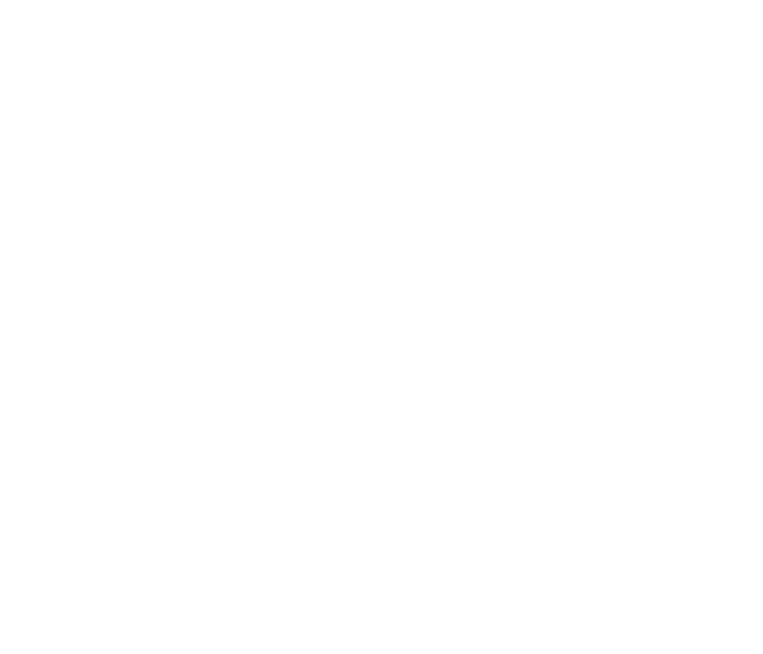

In [15]:
%matplotlib notebook
from interface_grille import Vue
NB_LIG = 4
NB_COL = 6
vue_laby = Vue(NB_LIG, NB_COL)

mes_murs_h = [[1, 1, 1, 1, 1, 1],
              [0, 1, 1, 1, 0, 1],
              [1, 1, 1, 0, 1, 0],
              [0, 1, 1, 1, 0, 1],
              [1, 1, 1, 1, 1, 0]]

mes_murs_v = [[0, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 1, 0, 1],
              [1, 0, 0, 0, 1, 0, 1],
              [1, 0, 0, 0, 0, 0, 1]]

mon_labyrinthe = [mes_murs_h, mes_murs_v]

def afficher_labyrinthe(laby):
    murs_h = laby[0]
    murs_v = laby[1]
    
    for lig in range(NB_LIG + 1):
        for col in range(NB_COL):
            if murs_h[lig][col] == 1:
                vue_laby.mg('mur_h', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), alpha = 1.0, v = True)
            else:
                vue_laby.mg('mur_h', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), alpha = 0, v = True)
                
    for lig in range(NB_LIG):
        for col in range(NB_COL + 1):
            if murs_v[lig][col] == 1:
                vue_laby.mg('mur_v', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), alpha = 1.0, v = True)  
            else:
                vue_laby.mg('mur_v', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), alpha = 0, v = True)
    
    for lig in range(NB_LIG):
        for col in range(NB_COL):
            vue_laby.mg('fond', lig, col, ce = (228, 192, 192), ci = (255, 228, 228), v = True)
            

def modifier_mur(labyrinthe, orientation, lig, col):
    if orientation == 'mur_h':
        murs = labyrinthe[0] #murs = murs_h
    elif orientation == 'mur_v':
        murs = labyrinthe[1] #murs = murs_v
        
    if murs[lig][col] == 1:
        murs[lig][col] = 0
    else:
        murs[lig][col] = 1       
    afficher_labyrinthe(labyrinthe)            
            
            
def gestionnaire_selection(evenement, labyrinthe):
    # à titre pédagogique : on affiche les datas de l'objet evenement renvoyé par l'interface
    vue_laby.mzt(t = 'Voici l\'évènement : ' + str(evenement), ct = (255, 0, 0))
    
    #on récupère certains attributs de l'évènement (certaines valeurs du dictionnaire evenement)
    objet = evenement['objet']
    lig = evenement['lig']
    col = evenement['col']
    
    if objet in ('mur_h', 'mur_v'): #pour ne pas appeler `modifier_mur` lorsqu'on clique un `fond`
        modifier_mur(labyrinthe, objet, lig, col)
        
    
afficher_labyrinthe(mon_labyrinthe)
vue_laby.lier_evenement('selection_objet', gestionnaire_selection, True, argument = mon_labyrinthe )

<div class = "alert alert-danger">


<h2>À retenir</h2>      
<h3> On est resté sur de l'interactivité simple (1 clic) </h3>  
Lorsqu'on souhaite mettre en place de l'interactivité complexe, cela a une influence sur la mémoire du projet. Typiquement il faut rajouter des "états" au projet (par exemple sous forme de drapeaux). En NSI ces problématiques sont secondaires et on consacrera d'abord son temps à des choses plus pertinentes (algorithmes de résolution, IA, génération automatique de grilles etc.). La mise en interactivité ne devra être abordée qu'en dernière étape.

<div class = "alert alert-info">

**Pour vérifier que l'on sait refaire :**
    
Rendre le sudoku interactif :
- en utilisant le type d'évènement `selection_objet`
- en utilisant la valeur associée à la clef `touche` du dictionnaire `evenement`.

On a donc un éditeur de labyrinthe en rajoutant de l'import/export (par exemple en JSON mais en CSV ce serait aussi possible) :

In [16]:
import json
def exporter_plateau(plateau, chemin_fichier):
    ''' exporte le plateau dans un (fichier au format JSON spécifié par le chemin)'''
    with open(chemin_fichier, 'w') as json_file:
        json.dump(plateau, json_file)

def importer_plateau(chemin_fichier):
    ''' importe le plateau qui est (stocké dans le fichier JSON spécifié par le chemin)'''
    with open(chemin_fichier, 'r') as json_file:
        plateau = json.load(json_file)
    return plateau

In [17]:
exporter_plateau(mon_labyrinthe, 'mon_labyrinthe_1.json')

In [18]:
labyrinthe_copie = importer_plateau('mon_labyrinthe_1.json')
afficher_labyrinthe(labyrinthe_copie)

# Pour aller plus loin (optimisation de l'actualisation de l'affichage)

Cette fois ci, cela fonctionne. Néanmoins on redessine **tout le plateau** à chaque fois alors que parfois seul un mur change. Si on change la taille du labyrinthe, le fait de tout redessiner peut rendre l'interactivité assez lente :

<IPython.core.display.Javascript object>


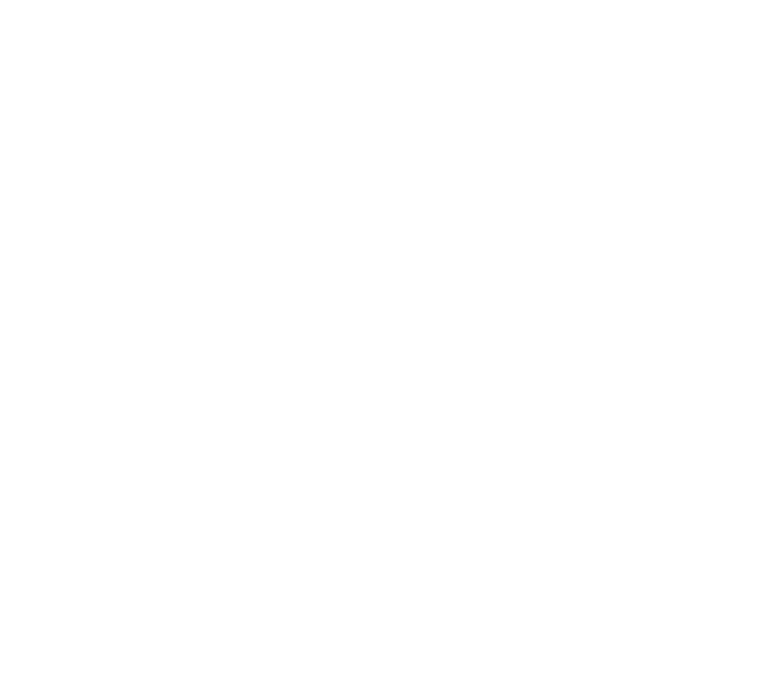

In [19]:
%matplotlib notebook
from interface_grille import Vue
NB_LIG = 15
NB_COL = 20
vue_laby = Vue(NB_LIG, NB_COL)

In [20]:
mes_murs_h = [[1]*NB_COL for i in range(NB_LIG + 1)]
mes_murs_v = [[1]*(NB_COL + 1) for i in range(NB_LIG)]
mon_labyrinthe = [mes_murs_h, mes_murs_v]

def afficher_labyrinthe_v2(laby):
    murs_h = laby[0]
    murs_v = laby[1]
    
    for lig in range(NB_LIG + 1):
        for col in range(NB_COL):
            if murs_h[lig][col] == 1:
                vue_laby.mg('mur_h', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), alpha = 1, v = True)
            else:
                vue_laby.mg('mur_h', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), alpha = 0, v = True)
                
    for lig in range(NB_LIG):
        for col in range(NB_COL + 1):
            if murs_v[lig][col] == 1:
                vue_laby.mg('mur_v', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), alpha = 1, v = True)  
            else:
                vue_laby.mg('mur_v', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), alpha = 0, v = True)
    
    for lig in range(NB_LIG):
        for col in range(NB_COL):
            vue_laby.mg('fond', lig, col, ce = (228, 192, 192), ci = (255, 228, 228), v = True)

def gestionnaire_selection(evenement, labyrinthe):
    objet = evenement['objet']
    if objet == 'mur_h':
        murs = labyrinthe[0]
    elif objet == 'mur_v':
        murs = labyrinthe[1]
        
    # on affiche les datas de l'objet evenement renvoyé par l'interface
    vue_laby.mzt(t = 'Voici l\'évènement : ' + str(evenement))
    
    #si on a sélectionné un mur horizontal, on l'enlève de la mémoire PUIS on rafraîchit l'affichage
    if evenement['objet'] == 'mur_h' or evenement['objet'] == 'mur_v':
        lig = evenement['lig']
        col = evenement['col']
        if murs[lig][col] == 1:
            murs[lig][col] = 0
        else: 
            murs[lig][col] = 1
        afficher_labyrinthe_v2(mon_labyrinthe)
    
afficher_labyrinthe_v2(mon_labyrinthe)
vue_laby.lier_evenement('selection_objet', gestionnaire_selection, True, argument = mon_labyrinthe )

Dans ce cas, si cette lenteur est rédhibitoire, au prix d'un effort supplémentaire on pourra créer une fonction d'affichage qui ne redessine que le mur modifié ... ou alors se tourner vers une interface graphique plus adaptée.

<IPython.core.display.Javascript object>


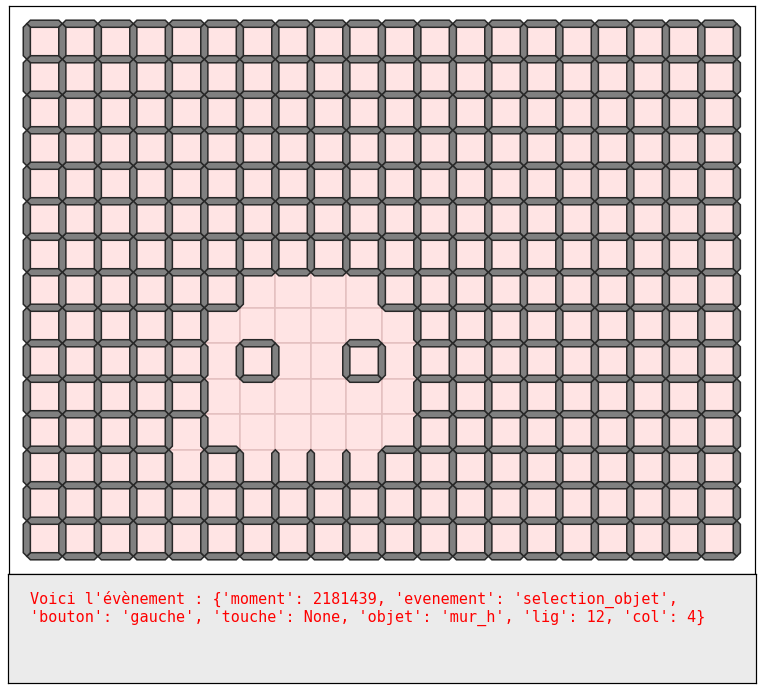

In [21]:
%matplotlib notebook
from interface_grille import Vue
NB_LIG = 15
NB_COL = 20
vue_laby = Vue(NB_LIG, NB_COL)

In [22]:
mes_murs_h = [[1]*NB_COL for i in range(NB_LIG + 1)]
mes_murs_v = [[1]*(NB_COL + 1) for i in range(NB_LIG)]
mon_labyrinthe = [mes_murs_h, mes_murs_v]

def afficher_labyrinthe_v2(laby):
    murs_h = laby[0]
    murs_v = laby[1]
    
    for lig in range(NB_LIG + 1):
        for col in range(NB_COL):
            if murs_h[lig][col] == 1:
                vue_laby.mg('mur_h', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), alpha = 1, v = True)
            else:
                vue_laby.mg('mur_h', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), alpha = 0, v = True)
                
    for lig in range(NB_LIG):
        for col in range(NB_COL + 1):
            if murs_v[lig][col] == 1:
                vue_laby.mg('mur_v', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), alpha = 1, v = True)  
            else:
                vue_laby.mg('mur_v', lig, col, ci = (128, 128, 128), ce = (40, 40, 40), alpha = 0, v = True)
    
    for lig in range(NB_LIG):
        for col in range(NB_COL):
            vue_laby.mg('fond', lig, col, ce = (228, 192, 192), ci = (255, 228, 228), v = True)
            
def actualiser_affichage_mur(objet, lig, col, alpha):  #<--------- RAFRAICHISSEMENT D'UN SEUL MUR
    vue_laby.mg(objet, lig, col, a = alpha)

def gestionnaire_selection(evenement, labyrinthe):
    objet = evenement['objet']
    if objet == 'mur_h':
        murs = labyrinthe[0]
    elif objet == 'mur_v':
        murs = labyrinthe[1]
        
    vue_laby.mzt(t = 'Voici l\'évènement : ' + str(evenement), ct = (255, 0, 0), tp = 10)
    
    if evenement['objet'] == 'mur_h' or evenement['objet'] == 'mur_v':
        lig = evenement['lig']
        col = evenement['col']
        if murs[lig][col] == 1:
            murs[lig][col] = 0
            actualiser_affichage_mur(evenement['objet'], lig, col, 0)   #<--------- RAFRAICHISSEMENT D'UN SEUL MUR
        else: 
            murs[lig][col] = 1
            actualiser_affichage_mur(evenement['objet'], lig, col, 1)   #<--------- RAFRAICHISSEMENT D'UN SEUL MUR
    
afficher_labyrinthe_v2(mon_labyrinthe)
vue_laby.lier_evenement('selection_objet', gestionnaire_selection, True, argument = mon_labyrinthe )